<a href="https://colab.research.google.com/github/adeangg/SkripsinyaAde/blob/main/Grey_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

In [2]:
data_artikel = [692.4, 803.0, 852.7, 951.9, 1053.4, 1106.1, 1208.6, 1301.6, 1346.1, 1368.7, 1480.4, 1601.6, 1761.7, 1925.0]
data_skripsi = [90153, 87023, 94190, 97512, 97400, 95103, 96012, 93192, 108479, 118720, 114112, 106970, 110932, 107321, 120994]
timestamp_skripsi = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
timestamp_artikel = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

data_real = data_skripsi
timestamp_real = timestamp_skripsi
n = 12
data_train = data_real[:n]
data_test = data_real[n:]

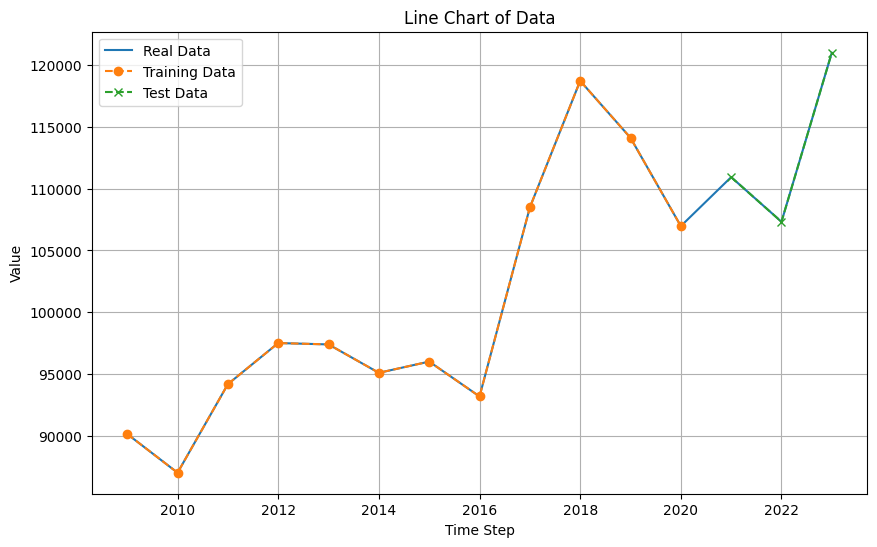

In [3]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timestamp_real, data_real, label='Real Data')
plt.plot(timestamp_real[:n], data_train, label='Training Data', marker='o', linestyle='--')
plt.plot(timestamp_real[n:], data_test, label='Test Data', marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Line Chart of Data')

# Add legend
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

In [4]:
def generate_ago(data): # Hitung 1-AGO atau X1
    return np.cumsum(data)

def basic_gm(X0): # Hitung parameter model
  X1 = np.cumsum(X0)
  n = len(X0)
  X1 = np.cumsum(X0)
  Z1 = (X1[:-1] + X1[1:]) / 2
  B = np.vstack([-Z1, np.ones(n - 1)]).T  # Matrix B
  Y = X0[1:]
  theta = np.linalg.inv(B.T @ B) @ B.T @ Y  # Parameter estimation for a and b
  a, b = theta[0], theta[1]
  return a, b

def predicted_gm(a, b, X1, steps): # Hitung X1_hat
  k = len(X1) + 1
  simulated_values = []
  for k in range(1, n + 1 + steps):
    term = (X1[0] - b / a) * np.exp(-a * (k - 1)) + b / a
    simulated_values.append(term)
  return simulated_values

def predicted_X0(X1_hat): #Hitung X0_hat
  X0_pred = np.diff(X1_hat, prepend=X1_hat[0])
  X0_pred[0] = X1_hat[0]
  return X0_pred

In [5]:
params = basic_gm(data_train)

a = params[0]
b = params[1]
X1 = generate_ago(data_train)
X1_hat = predicted_gm(a, b, X1, 3)

X0_hat = predicted_X0(X1_hat)
print('Deret X0_hat: ')
for val in X0_hat:
  print(f"{val:.4f}")

Deret X0_hat: 
90153.0000
89212.5617
91363.7199
93566.7485
95822.8981
98133.4496
100499.7148
102923.0371
105404.7924
107946.3895
110549.2715
113214.9160
115944.8365
118740.5829
121603.7423


In [6]:
def compute_mape(actual, predicted):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(mape, 4)

def compute_mae(actual, predicted):
    """
    Menghitung Mean Absolute Error (MAE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    mae = np.mean(np.abs(actual - predicted))
    return round(mae, 4)

def compute_rmse(actual, predicted):
    """
    Menghitung Root Mean Squared Error (RMSE).
    """
    actual, predicted = np.array(actual[1:]), np.array(predicted[1:])  # Skip nilai pertama
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return round(rmse, 4)

In [7]:
def compute_mape_test(actual, predicted):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(mape, 4)

def compute_mae_test(actual, predicted):
    """
    Menghitung Mean Absolute Error (MAE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    mae = np.mean(np.abs(actual - predicted))
    return round(mae, 4)

def compute_rmse_test(actual, predicted):
    """
    Menghitung Root Mean Squared Error (RMSE).
    """
    actual, predicted = np.array(actual), np.array(predicted)
    rmse = np.sqrt(np.mean((actual - predicted) ** 2))
    return round(rmse, 4)

In [8]:
def each_error(actual, predicted):
    """
    Menghitung persentase error untuk tiap pasangan nilai aktual dan prediksi.

    Parameters:
    - actual (list): Daftar nilai aktual.
    - predicted (list): Daftar nilai prediksi.

    Returns:
    - list: Daftar persentase error untuk tiap pasangan nilai.
    """
    if len(actual) != len(predicted):
        raise ValueError("Panjang data aktual dan prediksi harus sama.")

    percentage_error = [
        abs(pred - act) / act * 100
        for act, pred in zip(actual, predicted)
    ]
    return percentage_error

In [9]:
# Memanggil fungsi
errors = each_error(data_train, X0_hat[:n])

# Menampilkan hasil
for i, error in enumerate(errors, start=1):
    print(f"Data ke-{i}: Error = {error:.4f}%")

Data ke-1: Error = 0.0000%
Data ke-2: Error = 2.5161%
Data ke-3: Error = 3.0006%
Data ke-4: Error = 4.0459%
Data ke-5: Error = 1.6192%
Data ke-6: Error = 3.1865%
Data ke-7: Error = 4.6741%
Data ke-8: Error = 10.4419%
Data ke-9: Error = 2.8339%
Data ke-10: Error = 9.0748%
Data ke-11: Error = 3.1221%
Data ke-12: Error = 5.8380%


In [10]:
# Memanggil fungsi
errors = each_error(data_test, X0_hat[n:])

# Menampilkan hasil
for i, error in enumerate(errors, start=1):
    print(f"Data ke-{i + n}: Error = {error:.4f}%")

Data ke-13: Error = 4.5188%
Data ke-14: Error = 10.6406%
Data ke-15: Error = 0.5039%


In [11]:
print('MAPE training:', compute_mape(data_train, X0_hat[:n]))
print('MAE training:', compute_mae(data_train, X0_hat[:n]))
print('RMSE training:', compute_rmse(data_train, X0_hat[:n]))
print('----------------------------')
print('MAPE testing:', compute_mape_test(data_test, X0_hat[n:]))
print('MAE testing:', compute_mae_test(data_test, X0_hat[n:]))
print('RMSE testing:', compute_rmse_test(data_test, X0_hat[n:]))

MAPE training: 4.5776
MAE training: 4676.6236
RMSE training: 5494.328
----------------------------
MAPE testing: 5.2211
MAE testing: 5680.7205
RMSE testing: 7208.9571


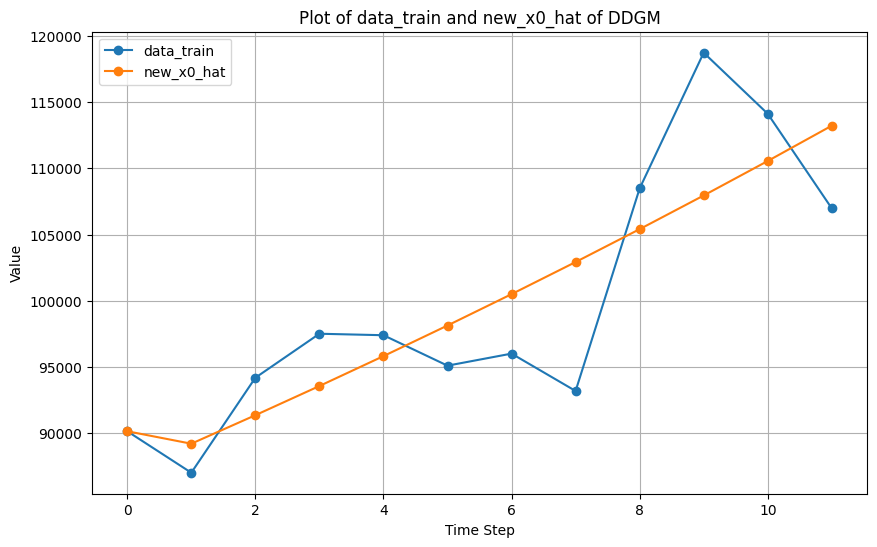

In [12]:
import matplotlib.pyplot as plt

# Assuming data_train and new_x0_hat are already defined from the previous code

plt.figure(figsize=(10, 6))
plt.plot(data_train, label='data_train', marker='o')
plt.plot(X0_hat[:n], label='new_x0_hat',  marker='o')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Plot of data_train and new_x0_hat of DDGM')
plt.legend()
plt.grid(True)
plt.show()